In [17]:
import os
import pandas
import geopandas
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point

# 1.选择区域

In [45]:
northwest = [34.27490, 108.751873]
southeast = [34.271604, 108.95520]
print("西北",northwest)
print("东南",southeast)

西北 [34.2749, 108.751873]
东南 [34.271604, 108.9552]


# 2.数据及预处理

In [ ]:
def filePath_extraction(dirpath,fileType):
    '''funciton-以所在文件夹路径为键，值为包含该文件夹下所有文件名的列表。文件类型可以自行定义 '''
    i=0
    for dirpath,dirNames,fileNames in os.walk(dirpath): #os.walk()遍历目录，使用help(os.walk)查看返回值解释
       i+=1
       if fileNames: #仅当文件夹中有文件时才提取
           filePath_Info=[dirpath+f for f in fileNames if f.split('.')[-1] in fileType]
    return filePath_Info

dirpath='./data/'
fileType=["json"]
poi_paths=filePath_extraction(dirpath,fileType)
print(poi_paths)


['./data/poi_0_delicacy.json', './data/poi_10_medicalTreatment.json', './data/poi_11_carService.json', './data/poi_12_trafficFacilities.json', './data/poi_13_finance.json', './data/poi_14_realEstate.json', './data/poi_15_corporation.json', './data/poi_16_government.json', './data/poi_1_hotel.json', './data/poi_2_shopping.json', './data/poi_3_lifeService.json', './data/poi_4_beauty.json', './data/poi_5_spot.json', './data/poi_6_entertainment.json', './data/poi_7_sports.json', './data/poi_8_education.json', './data/poi_9_media.json']


In [ ]:
pandas.read_json('./data/poi_0_delicacy.json')

,name,location,address,province,city,area,street_id,telephone,detail,uid,detail_info
0,户县兴伦美食广场,"{'lat': 34.113672, 'lng': 108.61473}",东街兴伦购物广场2楼(近户县大十字),陕西省,西安市,鄠邑区,d53e36ff9983316aa11de99b,"(029)62783211,15929907028",1,d53e36ff9983316aa11de99b,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108..."
1,户县机场老马家烧烤,"{'lat': 34.157196, 'lng': 108.597683}",陕西省西安市鄠邑区百丰村,陕西省,西安市,鄠邑区,NaN,13992801336,1,db7c222e3212dd885a3ac8e9,"{'tag': '美食;其他', 'type': 'cater', 'detail_url'..."
2,户县印象,"{'lat': 34.106033, 'lng': 108.630919}",鄠邑区人民路南段御苑新城8号商铺,陕西省,西安市,鄠邑区,88639ad04e1172e0df1e522a,(029)84881111,1,88639ad04e1172e0df1e522a,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url..."
3,长虹饭店(渼陂东路),"{'lat': 34.12213, 'lng': 108.615176}",陕西省西安市鄠邑区娄敬路139号,陕西省,西安市,鄠邑区,24292c38b28468d0118824eb,(029)84827788,1,24292c38b28468d0118824eb,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108..."
4,聚鑫缘食府,"{'lat': 34.115677, 'lng': 108.659891}",沣京开发区兴园路2号居正大厦一层,陕西省,西安市,鄠邑区,NaN,"(029)89022633,13572582848",1,4a3efb073648f51a343a71ee,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url..."
...,...,...,...,...,...,...,...,...,...,...,...
9446,惠民小吃,"{'lat': 34.543545, 'lng': 109.192044}",陕西省西安市临潼区新市街道油高路新市初级中学附近,陕西省,西安市,临潼区,NaN,NaN,1,37ce65b889fb52139122e062,"{'tag': '美食;小吃快餐店', 'type': 'cater', 'detail_u..."
9447,顺心小吃,"{'lat': 34.543545, 'lng': 109.192044}",新马路新市初级中学对面,陕西省,西安市,临潼区,NaN,NaN,1,25acc22f789da2f5cafa5f2a,"{'tag': '美食;小吃快餐店', 'type': 'cater', 'detail_u..."
9448,皇冠蛋糕,"{'lat': 34.51846, 'lng': 109.249942}",陕西省西安市临潼区X207,陕西省,西安市,临潼区,NaN,NaN,1,9998db2cb0526adcc9c3db54,"{'tag': '美食;蛋糕甜品店', 'type': 'cater', 'detail_u..."
9449,老马家饭庄,"{'lat': 34.549193, 'lng': 109.243541}",陕西省西安市临潼区X304,陕西省,西安市,临潼区,NaN,NaN,1,0d2ed936fb518298eb1e97a3,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url..."


In [ ]:
def poi_json2GeoDF(poi_paths):
    poi_geoDF=pandas.read_json(poi_paths)
    poi_geoDF['geometry']=poi_geoDF.apply(lambda row:Point(row.location['lng'],row.location['lat']),axis=1) 
    poi_geoDF["in"] = poi_geoDF["geometry"].apply(lambda x:x.y<=northwest[0] and x.y>=southeast[0] and x.x>=northwest[1] and x.x<=southeast[1])
    print(poi_geoDF.head())
    global pois
    pois+=[[i.x,i.y] for i in poi_geoDF["geometry"]]
    poiAll_gpd=gpd.GeoDataFrame(poi_geoDF,crs='epsg:32749')     
    return poiAll_gpd

         name                               location             address  \
0    户县兴伦美食广场   {'lat': 34.113672, 'lng': 108.61473}  东街兴伦购物广场2楼(近户县大十字)   
1   户县机场老马家烧烤  {'lat': 34.157196, 'lng': 108.597683}        陕西省西安市鄠邑区百丰村   
2        户县印象  {'lat': 34.106033, 'lng': 108.630919}    鄠邑区人民路南段御苑新城8号商铺   
3  长虹饭店(渼陂东路)   {'lat': 34.12213, 'lng': 108.615176}    陕西省西安市鄠邑区娄敬路139号   
4       聚鑫缘食府  {'lat': 34.115677, 'lng': 108.659891}    沣京开发区兴园路2号居正大厦一层   

  province city area                 street_id                  telephone  \
0      陕西省  西安市  鄠邑区  d53e36ff9983316aa11de99b  (029)62783211,15929907028   
1      陕西省  西安市  鄠邑区                       NaN                13992801336   
2      陕西省  西安市  鄠邑区  88639ad04e1172e0df1e522a              (029)84881111   
3      陕西省  西安市  鄠邑区  24292c38b28468d0118824eb              (029)84827788   
4      陕西省  西安市  鄠邑区                       NaN  (029)89022633,13572582848   

   detail                       uid  \
0       1  d53e36ff9983316aa11de99b   
1 

     name                               location                   address  \
0  荣华水岸新城  {'lat': 34.108414, 'lng': 108.600445}              西安市鄠邑区滨河大道1号   
1    御苑新城  {'lat': 34.104622, 'lng': 108.628828}                     人民路中段   
2    东城花园  {'lat': 34.121314, 'lng': 108.638335}  陕西省西安市鄠邑区东城花园(渼陂东路南100米)   
3   有色铂金城  {'lat': 34.106014, 'lng': 108.600738}    陕西省西安市鄠邑区涝滨南路(荣华水岸新城南)   
4   帕堤欧公馆  {'lat': 34.112121, 'lng': 108.639693}              沣京路与南北六号路西南角   

  province city area                 street_id      telephone  detail  \
0      陕西省  西安市  鄠邑区  bbbb166f164ad2f616c9051e  (029)84888666       1   
1      陕西省  西安市  鄠邑区  5c56edd611bf1f59a1d23040  (029)84827712       1   
2      陕西省  西安市  鄠邑区  7d881622153f2887157643f5            NaN       1   
3      陕西省  西安市  鄠邑区  806996886df85360c4f02577            NaN       1   
4      陕西省  西安市  鄠邑区  c0dd103625e88090ad080f27            NaN       1   

                        uid  \
0  bbbb166f164ad2f616c9051e   
1  5c56edd611bf1f59a1d23040   

           name                               location                address  \
0  中国联通(沣京路营业厅)  {'lat': 34.114049, 'lng': 108.627763}        陕西省西安市鄠邑区天慧国际1楼   
1    西安汽车零部件产业园   {'lat': 34.13435, 'lng': 108.675922}          陕西省西安市鄠邑区沣五东路   
2  中国移动(迎宾路营业厅)  {'lat': 34.113614, 'lng': 108.634062}      陕西省西安市鄠邑区京兆小区楼下附近   
3    户县三球仪火补修理部  {'lat': 34.102886, 'lng': 108.612402}  陕西省西安市鄠邑区吕公路天府川菜馆西30米   
4        火车票代售点   {'lat': 34.11435, 'lng': 108.629623}          人民路与丰京路交汇处西北角   

  province city area                 street_id                  telephone  \
0      陕西省  西安市  鄠邑区  7e5e285f7e7c726826e0a09d              (029)68738898   
1      陕西省  西安市  鄠邑区                       NaN                        NaN   
2      陕西省  西安市  鄠邑区  03f6c12a0805b1a5c61e51c6                        NaN   
3      陕西省  西安市  鄠邑区  def5057d16f856808c1a89f6  (029)84820666,13519135666   
4      陕西省  西安市  鄠邑区  00d179d8fa27a70b593ac815                        NaN   

   detail                       uid  \
0       1  

            name                               location  \
0       户县驾校培训基地  {'lat': 34.090082, 'lng': 108.642486}   
1  西安市户县当代舞蹈培训中心  {'lat': 34.110204, 'lng': 108.626986}   
2         西安恒顺驾校  {'lat': 34.088112, 'lng': 108.627827}   
3       宝贝时光早教中心  {'lat': 34.109678, 'lng': 108.626655}   
4        户县腊家滩驾校  {'lat': 34.083219, 'lng': 108.562487}   

                       address province city area  detail  \
0                     G5京昆高速附近      陕西省  西安市  鄠邑区       1   
1               东新路与朝阳路交叉口东50米      陕西省  西安市  鄠邑区       1   
2                 陕西省西安市鄠邑区金沣路      陕西省  西安市  鄠邑区       1   
3  陕西省西安市鄠邑区小丰村西二巷与朝阳路交叉口东北50米      陕西省  西安市  鄠邑区       1   
4             陕西省西安市鄠邑区108省道附近      陕西省  西安市  鄠邑区       1   

                        uid  \
0  a8512e139dd236378b2fb5a0   
1  dea7bd97bc40ffcdbf4842e5   
2  550fd5f94876b47a931fc96a   
3  c9220b622400bd6c43e1920a   
4  838ee1496d6b029633169b3e   

                                         detail_info  \
0  {'tag': '教育培训;培训机构', 'type': 'ed

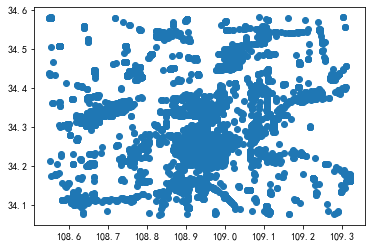

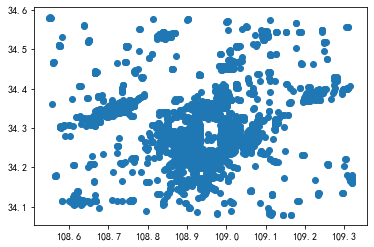

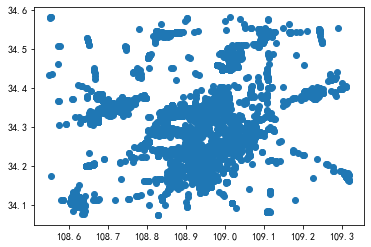

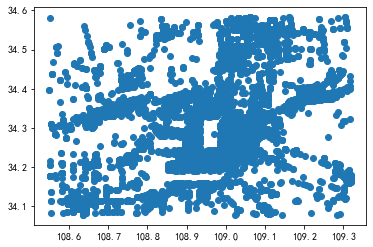

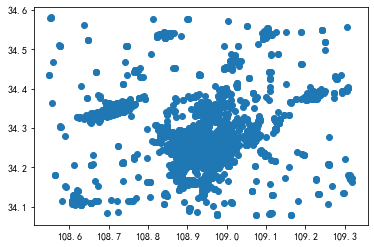

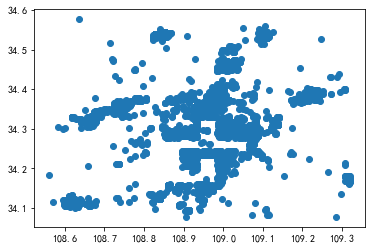

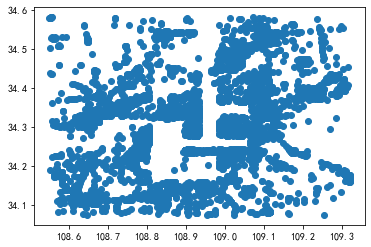

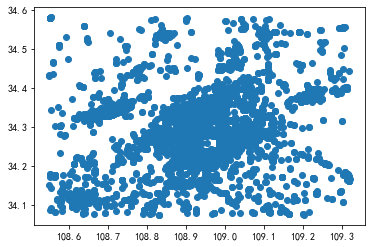

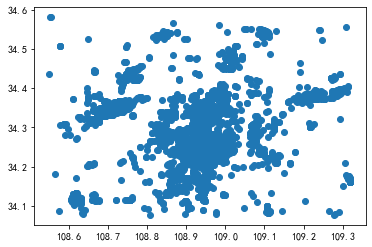

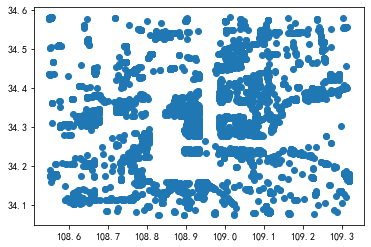

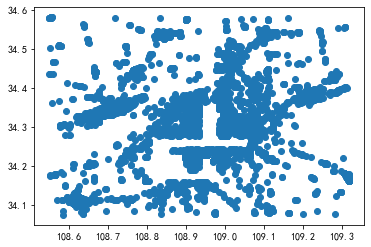

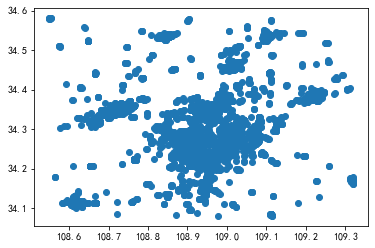

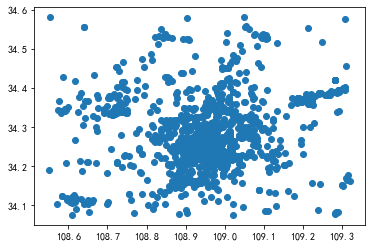

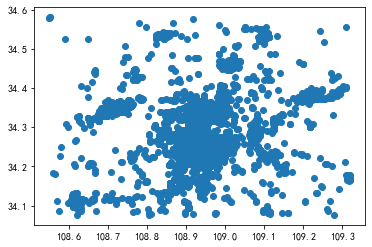

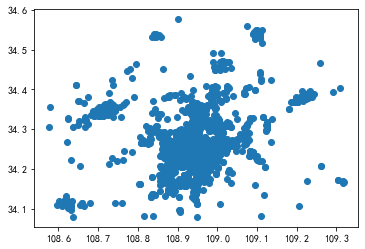

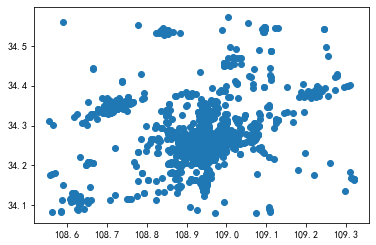

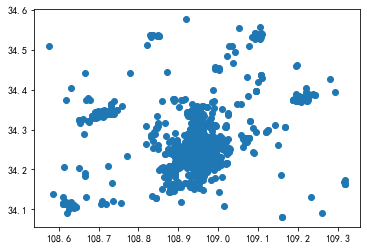

In [ ]:
global pois
pois = []
for i in poi_paths:
    poi_gpd=poi_json2GeoDF(i).plot()

In [50]:
import geopandas as gpd
from matplotlib import pyplot as plt

data = gpd.read_file(r'/content/python_code_archi_la_design_method_study/notebook/data/xianBuildingHeight/xian_Project.shp',encoding = 'gb18030')#读取磁盘上的矢量文件
poiAll_gpd=gpd.GeoDataFrame(data,crs='epsg:32749') 
#data = gpd.read_file('shapefile/china.gdb', layer='province')#读取gdb中的矢量数据
# print(data.crs)  # 查看数据对应的投影信息
# print(data.head())  # 打印Dataframe
# data.plot()
# plt.show()#打印图表

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """


In [33]:
t_wgs84 = data.to_crs({'init': 'epsg:4326'}) 
t_wgs84.head(2)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Id,Floor,geometry
0,0,4,"POLYGON ((108.75168 34.27170, 108.75191 34.271..."
1,0,6,"POLYGON ((108.75501 34.03893, 108.75607 34.038..."


In [51]:
data['lon'] = t_wgs84.centroid.x #提取出lon 
data['lat'] = t_wgs84.centroid.y#提取出lat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [52]:
data=data[(data['lon']>108.751873) & (data['lon']<108.95520)&(data['lat']>34.271604)&(data['lat']<34.27490)]
data

,Id,Floor,geometry,lon,lat
29,0,30,"POLYGON ((295023.281 3794877.961, 295047.952 3...",108.773533,34.274795
33,0,30,"POLYGON ((295018.900 3794767.911, 295045.592 3...",108.773518,34.273796
34,0,30,"POLYGON ((295017.634 3794709.917, 295044.326 3...",108.773522,34.273273
35,0,30,"POLYGON ((295041.550 3794808.745, 295046.493 3...",108.773635,34.274209
58,0,3,"POLYGON ((295232.866 3794873.634, 295233.424 3...",108.775671,34.274820
...,...,...,...,...,...
77984,0,4,"POLYGON ((311738.882 3794507.939, 311750.693 3...",108.955008,34.274678
78028,0,2,"POLYGON ((311737.168 3794422.425, 311741.105 3...",108.954965,34.273907
78029,0,2,"POLYGON ((311737.483 3794438.152, 311741.420 3...",108.954965,34.274053
78045,0,4,"POLYGON ((311738.764 3794502.041, 311750.575 3...",108.955008,34.274607


In [46]:
northwest = [34.27490, 108.751873]
southeast = [34.271604, 108.95520]
print("西北",northwest)
print("东南",southeast)

西北 [34.2749, 108.751873]
东南 [34.271604, 108.9552]


In [57]:
g['Floor'].value_counts()

2     1067
6      319
5      229
4      227
1      177
3      135
7       54
8       22
11      16
9       13
10      13
30      12
12       7
13       7
17       6
21       5
26       5
32       3
18       3
15       3
20       2
22       2
14       1
25       1
31       1
Name: Floor, dtype: int64

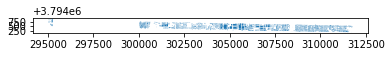

In [55]:
g.plot()

# 3. 分析

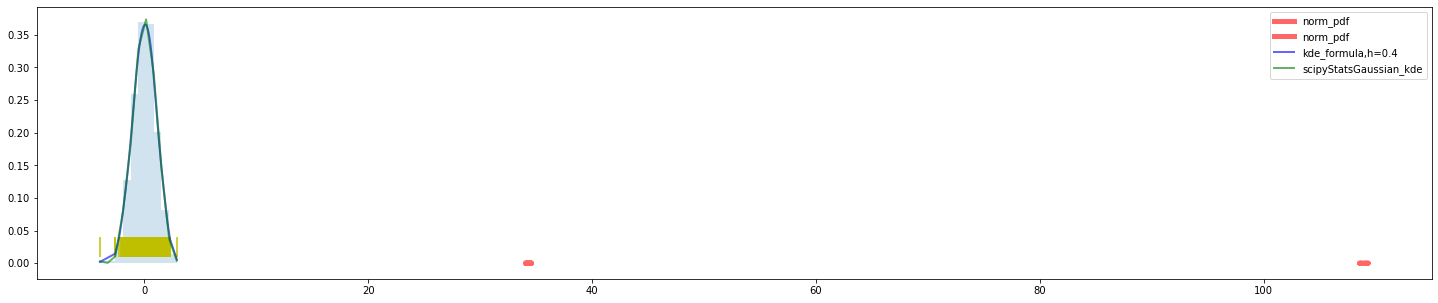

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
x = pois
pdf=stats.norm.pdf(x)

plt.figure(figsize=(25,5))
plt.plot(x,pdf,'r-', lw=5, alpha=0.6, label='norm_pdf')

random_variates=stats.norm.rvs(loc=0,scale=1,size=500)
count, bins, ignored =plt.hist(random_variates,bins=10,density=True,histtype='stepfilled',alpha=0.2)
plt.eventplot(random_variates,color='y',linelengths=0.03,lineoffsets=0.025)

rVar_sort=np.sort(random_variates)
h=0.4 #带宽（bandwidth,bw）
n=len(rVar_sort)
kde_Gaussian=[sum(math.exp(-1*math.pow(vi-vj,2)/(2*math.pow(h,2))) for vj in rVar_sort)/(h*n*math.sqrt(2*math.pi)) for vi in rVar_sort] 
plt.plot(rVar_sort,kde_Gaussian,'b-', lw=2, alpha=0.6, label='kde_formula,h=%s'%h)

scipyStatsGaussian_kde=stats.gaussian_kde(random_variates)
plt.plot(bins,scipyStatsGaussian_kde(bins),'g-', lw=2, alpha=0.6, label='scipyStatsGaussian_kde')
plt.legend()
plt.show()


In [ ]:
#聚类

distance_differences: [13.57318699  0.         65.43360942]
distance_differences: [0.00000000e+00 4.43754851e+01 8.24150133e-03]
distance_differences: [ 0.         21.55176337  0.78442102]
distance_differences: [0.         7.81351197 0.96019952]
distance_differences: [0.         2.33780654 0.25258262]
distance_differences: [0.         0.46442823 0.04642314]
distance_differences: [0.         0.44525293 0.03893819]
distance_differences: [0. 0. 0.]


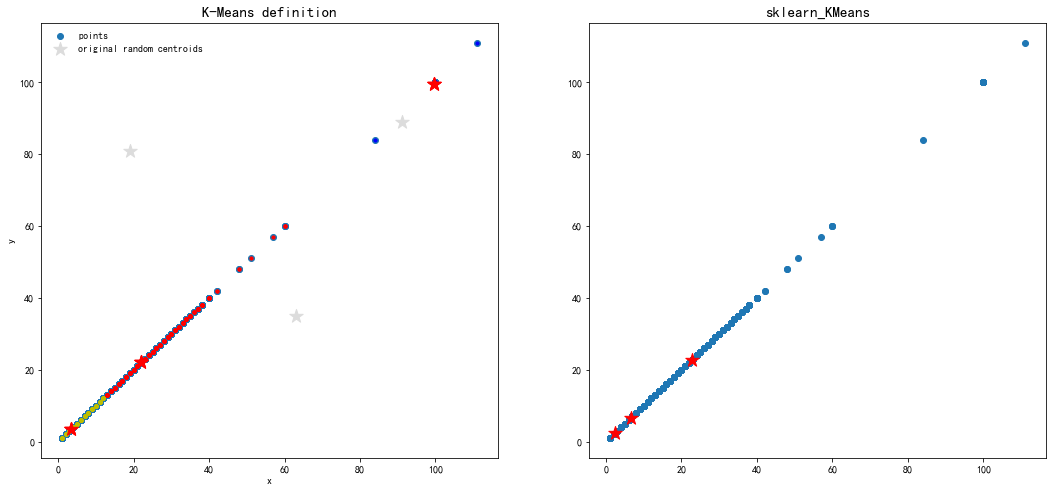

In [ ]:
import numpy as np
class K_Means:
    '''
    class - 定义K-Means算法
    
    Paras:
    X - 待分簇的数据（数组）
    k - 分簇数量
    figsize - Matplotlib图表大小
    '''    
    def __init__(self,X,k,figsize):              
        self.X=X
        self.k=k
        self.figsize=figsize              

    def euclidean_distance(self,a,b,ax=1):
        import numpy as np 
        '''
        function - 计算两点距离。To calculate the distance between two points
        
        Paras:
        a - 2维度数组，例如[[3,4]
                           [5,6]
                           [1,4]]
        b - 2维度数组
        ax - 计算轴
        '''
        return np.linalg.norm(a-b, axis=ax)
    
    def update(self,ax): 
        from copy import deepcopy
        import numpy as np
        '''
        function - K-Means算法
        '''
        #生产随机质心 generate k random points (centroids)
        Cx=np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=self.k)
        Cy=np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=self.k)
        ax.scatter(Cx, Cy,label="original random centroids",marker='*',c='gainsboro',s=200)  

        C=np.array(list(zip(Cx, Cy)), dtype=np.float64) #质心数组 -represent the k centroids as a matrix
        C_prev=np.zeros(C.shape) #建立同质心数组形状，值为0的数组-create a matrix of 0 with same dimension as C (centroids)
        clusters=np.zeros(len(X))#存储每个点所属子群-to store the cluster each point belongs to    
        distance_differences=self.euclidean_distance(C, C_prev)#计算质心与C_prev之间的距离-measure the distance between the centroids and C_prev        
        
        #循环计算，缩小前一步和后一步质心距离的差异 -loop as long as there is still a difference in distance between the previous and current centroids
        count=0
        while distance_differences.any() != 0:
            #将每个值分配到最近的簇-assign each value to its closest cluster
            for i in range(len(self.X)):
                distances=self.euclidean_distance(self.X[i], C)
                cluster=np.argmin(distances) #延着一个轴，返回最小值索引-returns the indices of the minimum values along an axis
                clusters[i]=cluster
                
            C_prev=deepcopy(C) #存储前一质心-store the prev centroids

            #通过取均值寻找新的质心-find the new centroids by taking the average value
            for i in range(k):
                points=[X[j] for j in range(len(X)) if clusters[j]==i] #取簇i中的所有点-take all the points in cluster i
                if len(points)!=0:
                    C[i]=np.mean(points,axis=0)

            distance_differences=self.euclidean_distance(C, C_prev) #计算前一与后一质心的距离-find the distances between the old centroids and the new centroids
            print("distance_differences:",distance_differences)
            count+=1

        #打印散点图-plot the scatter plot
        colors=['b','r','y','g','c','m']
        for i in range(k):
            points=np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            if len(points) > 0:
                ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
            else:
                print("Plesae regenerate your centroids again.")#这意味着其中一个簇没有点 this means that one of the clusters has no points
            #ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
            ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='red')     
            
    def sklearn_KMeans(self,ax):
        from sklearn.cluster import KMeans
        '''
        function - 使用Sklearn库的KMeans算法聚类
        '''
        kmeans=KMeans(n_clusters=self.k)
        kmeans=kmeans.fit(self.X)
        labels=kmeans.predict(self.X)
        centroids = kmeans.cluster_centers_
        
        c = ['b','r','y','g','c','m']
        colors = [c[i] for i in labels]        
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
        
    
    def execution(self):
        %matplotlib inline
        import matplotlib.pyplot as plt
        '''
        function - 执行
        '''
        fig, axs=plt.subplots(1,2,figsize=self.figsize)  
        axs[0].scatter(self.X[:,0], self.X[:,1],label="points")
        axs[0].set_title(r'K-Means definition', fontsize=15)
        self.update(axs[0])
    
        axs[1].scatter(self.X[:,0], self.X[:,1],label="points")
        axs[1].set_title(r'sklearn_KMeans', fontsize=15)
        self.sklearn_KMeans(axs[1])
    
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].legend(loc='upper left', frameon=False)
        plt.show()
            
kmeans_dataset=[(i,i) for i in g["Floor"]]
X=np.array(kmeans_dataset) 
k=3 #配置分组的数量（亦随机生成中心的数量）
figsize=(18,8)
K=K_Means(X,k,figsize)
K.execution()


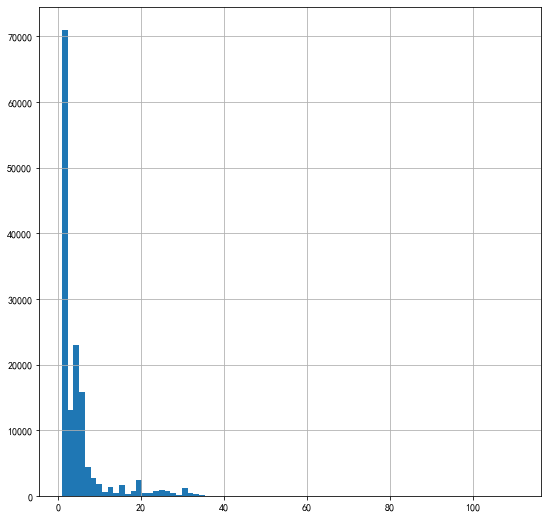

In [ ]:
# 3.3 西安建筑高度统计量分析
floors = g["Floor"].hist(figsize=[9,9],bins = 80)

In [ ]:
# 统计
data = g["Floor"]
print("最大值:",np.max(data))
print("最小值:",np.min(data))
print("均值:",np.mean(data))
print("方差:",np.std(data))

最大值: 111
最小值: 1
均值: 4.907533420201728
方差: 5.763548098631651


In [ ]:
# 3.3 第二份 各区教育poi统计
data = pandas.read_json('./data/poi_8_education.json')
d = data.groupby("area")
d = d.groups
for k,v in d.items():
    d[k] = len(v)
d

{'临潼区': 76, '兴平市': 2, '新城区': 111, '未央区': 172, '泾阳县': 26, '渭城区': 67, '灞桥区': 91, '碑林区': 196, '礼泉县': 1, '秦都区': 90, '莲湖区': 160, '蓝田县': 13, '鄠邑区': 64, '长安区': 119, '雁塔区': 393, '高陵区': 50}

In [ ]:
# 3.3 第三份 西安城市数及区域数统计
data = pandas.read_json('./data/poi_8_education.json')
d = data.groupby(["city","area"])
result = {}
for k in d.groups.keys():
    if k[0] not in result:
        result[k[0]] = []
    result[k[0]].append(k[1])
result

{'咸阳市': ['兴平市', '泾阳县', '渭城区', '礼泉县', '秦都区'],
 '西安市': ['临潼区',
  '新城区',
  '未央区',
  '灞桥区',
  '碑林区',
  '莲湖区',
  '蓝田县',
  '鄠邑区',
  '长安区',
  '雁塔区',
  '高陵区']}

In [ ]:
# 3.3 第四份 西安娱乐场所分布
data = pandas.read_json('./data/poi_6_entertainment.json')
d = data["location"]
d

0       {'lat': 34.114851, 'lng': 108.613909}
1       {'lat': 34.114077, 'lng': 108.615356}
2       {'lat': 34.114349, 'lng': 108.617478}
3       {'lat': 34.114488, 'lng': 108.628826}
4       {'lat': 34.113962, 'lng': 108.627623}
                        ...                  
4446    {'lat': 34.425913, 'lng': 109.281201}
4447    {'lat': 34.461472, 'lng': 109.199173}
4448    {'lat': 34.518978, 'lng': 109.252513}
4449    {'lat': 34.556125, 'lng': 109.308746}
4450    {'lat': 34.547764, 'lng': 109.243432}
Name: location, Length: 4451, dtype: object

In [ ]:
data = [[i['lat'],i['lng']] for i in d]
data

[[34.114851, 108.613909],
 [34.114077, 108.615356],
 [34.114349, 108.617478],
 [34.114488, 108.628826],
 [34.113962, 108.627623],
 [34.121857, 108.60735],
 [34.113799, 108.630297],
 [34.113637, 108.616439],
 [34.119202, 108.61007],
 [34.114493, 108.618161],
 [34.106033, 108.630919],
 [34.111398, 108.631653],
 [34.121876, 108.607283],
 [34.114495, 108.633216],
 [34.113374, 108.632088],
 [34.110865, 108.617753],
 [34.114422, 108.613183],
 [34.113053, 108.659588],
 [34.116373, 108.614318],
 [34.105627, 108.652153],
 [34.115891, 108.621868],
 [34.130357, 108.610884],
 [34.095765, 108.610989],
 [34.113421, 108.617102],
 [34.113245, 108.659164],
 [34.116222, 108.631791],
 [34.115702, 108.631392],
 [34.115518, 108.614375],
 [34.112974, 108.626149],
 [34.115677, 108.659891],
 [34.106801, 108.616651],
 [34.111771, 108.610183],
 [34.121784, 108.621896],
 [34.111954, 108.61538],
 [34.120437, 108.610265],
 [34.10859, 108.631064],
 [34.11561, 108.630879],
 [34.113421, 108.617102],
 [34.107202, 108.

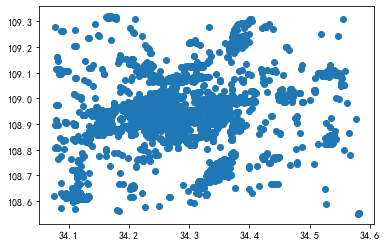

In [ ]:
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])

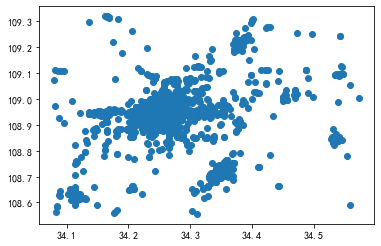

In [ ]:
# 3.3 第五份 西安政府分布
data = pandas.read_json('./data/poi_8_education.json')
d = data["location"]
data = [[i['lat'],i['lng']] for i in d]
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])

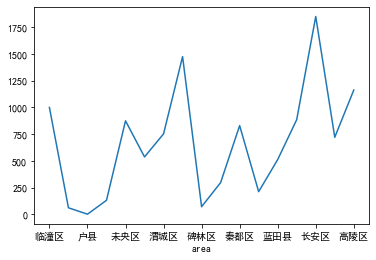

In [ ]:
# 3.3 第五份 西安各区商场分布
#解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
data = pandas.read_json('./data/poi_2_shopping.json')
d = data.groupby("area").count()['detail']
d.plot()
